In [2]:
import chollaread
import numpy as np
import yt
import trident
import matplotlib.pyplot as plt

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [3]:
import matplotlib.patches as mpatches

In [4]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/146.h5', cell_size_cgs = 10*chollaread.kpc/256)

yt : [INFO     ] 2022-01-27 00:46:50,002 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-01-27 00:46:50,002 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-01-27 00:46:50,003 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-01-27 00:46:50,003 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-01-27 00:46:50,004 Parameters: cosmological_simulation   = 0.0


In [5]:
def spec_all(x0, y0, z0, x, y, z, Ny, Nz, instrument, line_list, lmin, lmax):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(instrument)
            sg.make_spectrum(ray, lines=[line_list])
            sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
  
    print(arrays)
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
    #Plot
    fig = plt.figure(figsize=(15, 5))

    plt.plot(arrays[0][0], avg, color='black', label = "Average Spectrum", linewidth=1.75)
    plt.xlim(lmin, lmax)
    plt.title(line_list)
    plt.legend(fontsize='large')
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')


In [6]:
def spec_qred_all(x0, y0, z0, x, y, z, Ny, Nz, instrument, line_list, lmin, lmax):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    qred = [0, 1]
    
    files = ['spec.txt', 'spec2.txt']
    
    for Z in range(len(qred)):
        for i in range(Ny):
            for j in range(Nz):

                ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
                ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

                ray = trident.make_simple_ray(ds,
                                             start_position=ray_start,
                                             end_position=ray_end,
                                             data_filename= 'ray.h5',
                                             lines='all',
                                             ftype='gas')



                sg = trident.SpectrumGenerator(instrument)
                sg.make_spectrum(ray, lines=[line_list])
                sg.add_qso_spectrum(emitting_redshift=qred[Z])
                sg.save_spectrum(files[Z])

                f = np.loadtxt(files[Z])
                lam = f[:,0] # All rows, 1st column
                flux = f[:,2]

                tog = np.array([lam, flux])
                arrays.append(tog)


        # Average Flux
        flux_list = []
        avg = []

        for n in range(Ny*Nz): # N = Ny * Nz     
            flux_ = arrays[n][1]
            flux_list.append(flux_) # Append flux to a list
            flux_arr = np.array(flux_list) # Turn list into an array
            flux_a = flux_arr.T # Transpose array

        for m in range(len(flux_a)):
            avg_ = np.average(flux_a[m])
            avg.append(avg_)
            
        print(avg)

        #Plot
#         fig = plt.figure(figsize=(15, 5))



#         plt.plot(arrays[0][0], avg)
#         plt.xlim(lmin, lmax)
#         plt.title(line_list)
#         plt.legend(fontsize='large')
#         plt.xlabel('Wavelength')
#         plt.ylabel('Relative Flux')
    


In [7]:
def spec_qred(x0, y0, z0, x, y, z, Ny, Nz, instrument, line_list, qred, title):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(instrument)
            sg.make_spectrum(ray, lines=[line_list])
            sg.add_qso_spectrum(emitting_redshift=qred)
            sg.save_spectrum(title)

            f = np.loadtxt(title)
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
 

    return arrays[0][0], avg



In [8]:
def spec_red(x0, y0, z0, x, y, z, Ny, Nz, instrument, line_list, red, title):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas', redshift= red)



            sg = trident.SpectrumGenerator(instrument)
            sg.make_spectrum(ray, lines=[line_list])
            sg.save_spectrum(title)

            f = np.loadtxt(title)
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
 

    return arrays[0][0], avg

In [9]:
def spec_obr(x0, y0, z0, x, y, z, Ny, Nz, instrument, line_list, red, title):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(instrument)
            sg.make_spectrum(ray, lines=[line_list], observing_redshift= red)
            sg.save_spectrum(title)

            f = np.loadtxt(title)
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
 

    return arrays[0][0], avg


In [10]:
def spec_noise(x0, y0, z0, x, y, z, Ny, Nz, instrument, line_list, noise, title):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(instrument)
            sg.make_spectrum(ray, lines=[line_list])
            sg.add_gaussian_noise(noise)
            sg.save_spectrum(title)

            f = np.loadtxt(title)
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)

    return arrays[0][0], avg


In [11]:
def spec_mw(x0, y0, z0, x, y, z, Ny, Nz, instrument, line_list, lmin, lmax ):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(instrument)
            sg.make_spectrum(ray, lines=[line_list])
            sg.add_milky_way_foreground()
            sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
    fig = plt.figure(figsize=(15, 5))

    plt.plot(arrays[0][0], avg, color='black', label = "Average Spectrum", linewidth=1.75)
    plt.xlim(lmin, lmax)
    plt.title(line_list)
    plt.legend(fontsize='large')
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')

In [12]:
def projx(y_, z_):
    
    k = (3.086E+21)*10
    
    px = yt.ProjectionPlot(ds, 'x', 'density')
    px.annotate_marker((y_,z_), coord_system="plot", plot_args={"color":"black", "s": 200})
    px.show()

In [13]:
def slicep():

    sl = yt.SlicePlot(ds, "z", [("density")])
    sl.annotate_ray(ray_, arrow=True)
    sl.set_cmap(("density"), "BLUE-RED")

    sl.show()

In [14]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [15]:
ray_ = make_ray(0, .65, .5, 2, .65, .5)

yt : [INFO     ] 2022-01-27 00:46:53,425 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-27 00:46:53,428 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-27 00:46:54,175 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-01-27 00:46:54,257 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-27 00:46:54,257 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-27 00:46:54,258 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-27 00:46:54,258 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+2

yt : [INFO     ] 2022-01-27 00:46:54,327 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-01-27 00:46:54,328 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 00:46:54,328 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-01-27 00:46:54,329 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 00:46:54,329 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] =


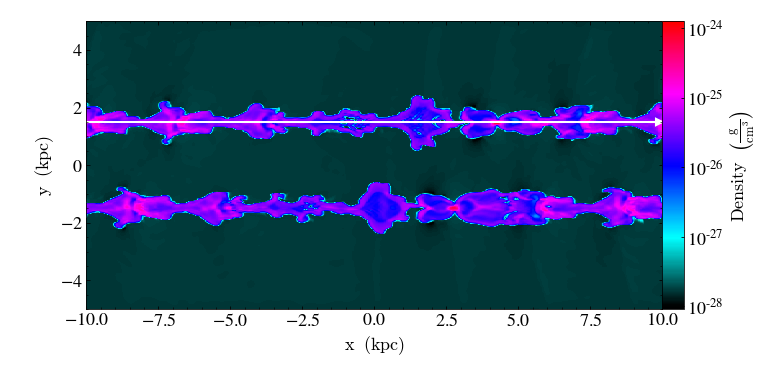

In [16]:
slicep()

yt : [INFO     ] 2022-01-27 00:46:58,594 Projection completed
yt : [INFO     ] 2022-01-27 00:46:58,595 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 00:46:58,595 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 00:46:58,596 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 00:46:58,596 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-01-27 00:46:58,596 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releas


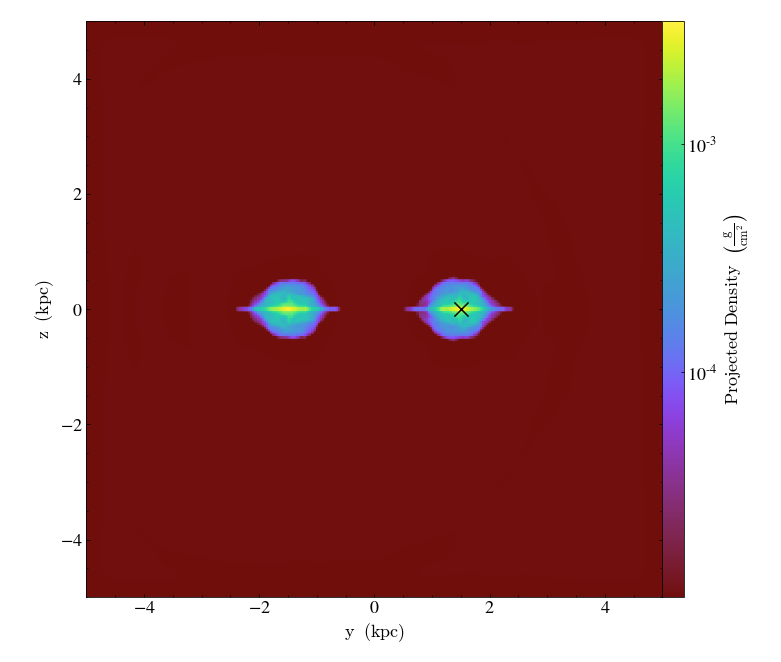

In [17]:
projx(1.5, 0)

# C IV

yt : [INFO     ] 2022-01-26 19:45:50,026 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:45:50,027 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:45:50,743 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:45:50,823 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:45:50,823 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:45:50,824 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:45:50,824 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:45:56,994 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:45:56,995 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:45:57,640 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:45:57,717 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:45:57,717 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:45:57,717 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:45:57,718 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:45:57,718 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:45:57,719 Setting instrument to COS-G160M
yt : [INFO   

[array([[1.404996e+03, 1.405008e+03, 1.405020e+03, ..., 1.776972e+03,
        1.776984e+03, 1.776996e+03],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00]]), array([[1.404996e+03, 1.405008e+03, 1.405020e+03, ..., 1.776972e+03,
        1.776984e+03, 1.776996e+03],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00]]), array([[1.404996e+03, 1.405008e+03, 1.405020e+03, ..., 1.776972e+03,
        1.776984e+03, 1.776996e+03],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00]]), array([[1.404996e+03, 1.405008e+03, 1.405020e+03, ..., 1.776972e+03,
        1.776984e+03, 1.776996e+03],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00]]), array([[1.404996e+03, 1.405008e+03, 1.405020e+03, ..., 1.776972e+03,
        1.776984e+03, 1.776996e+03],
       [1.000000e+00, 1.000000e+00, 1

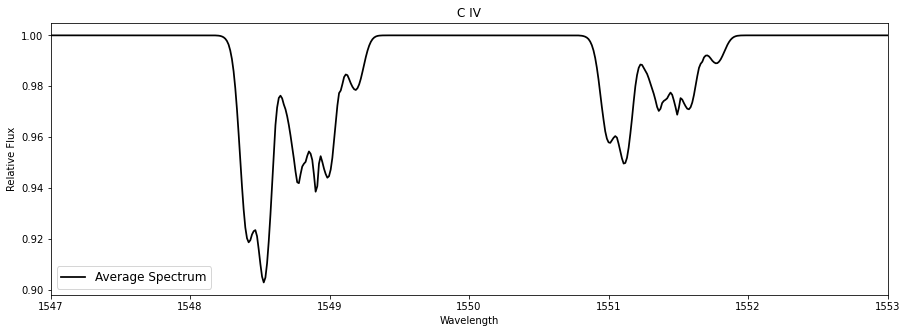

In [17]:
spec_all(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 1547, 1553)

## Quasar background added

### Normal Wavelength

In [18]:
z0 = spec_qred(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 0.23, 'spec.txt')
z2 = spec_qred(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 0.2, 'spec2.txt')
z5 = spec_qred(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 0.26, 'spec5.txt')
z1 = spec_qred(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 0.29, 'spec1.txt')

yt : [INFO     ] 2022-01-26 19:46:01,429 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:46:01,430 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:46:02,088 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:46:02,164 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:46:02,165 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:46:02,165 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:46:02,165 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:46:08,558 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:46:08,559 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:46:09,324 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:46:09,406 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:46:09,406 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:46:09,407 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:46:09,407 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:46:09,407 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:46:09,408 Setting instrument to COS-G160M
yt : [INFO   

yt : [INFO     ] 2022-01-26 19:46:16,358 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:46:17,119 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:46:17,199 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:46:17,200 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:46:17,200 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:46:17,200 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:46:17,201 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:46:17,201 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:46:17,213 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:46:17,217 Identified 2.490e+02 octs
yt : [INFO   

yt : [INFO     ] 2022-01-26 19:46:24,453 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:46:24,534 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:46:24,534 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:46:24,534 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:46:24,535 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:46:24,535 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:46:24,536 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:46:24,548 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:46:24,552 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:46:24,637 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:46:24,641 Creating spectrum
A

yt : [INFO     ] 2022-01-26 19:46:32,027 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:46:32,028 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:46:32,028 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:46:32,029 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:46:32,039 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:46:32,043 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:46:32,129 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:46:32,133 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 5842.36it/s]
yt : [INFO     ] 2022-01-26 19:46:32,371 Writing spectrum to ascii file: spec5.txt.
yt : [INFO     ] 2022-01-26 19:46:32,698 Getting segment at z = 0.0: [0.         0.32890

yt : [INFO     ] 2022-01-26 19:46:39,393 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:46:39,394 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:46:39,403 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:46:39,407 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:46:39,492 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:46:39,495 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6450.24it/s]
yt : [INFO     ] 2022-01-26 19:46:39,722 Writing spectrum to ascii file: spec1.txt.
yt : [INFO     ] 2022-01-26 19:46:40,052 Getting segment at z = 0.0: [0.         0.32695313 0.25      ] unitary to [1.         0.32695313 0.25      ] unitary.
yt : [INFO     ] 2022-01-26 19:46:40,054 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unita

yt : [INFO     ] 2022-01-26 19:46:46,762 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:46:46,847 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:46:46,850 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 5924.89it/s]
yt : [INFO     ] 2022-01-26 19:46:47,086 Writing spectrum to ascii file: spec1.txt.
yt : [INFO     ] 2022-01-26 19:46:47,408 Getting segment at z = 0.0: [0.         0.33085938 0.25195312] unitary to [1.         0.33085938 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:46:47,409 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary] to [1.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:46:48,132 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:46:48,213 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:46:48,213 Parameter

Text(0, 0.5, 'Relative Flux')

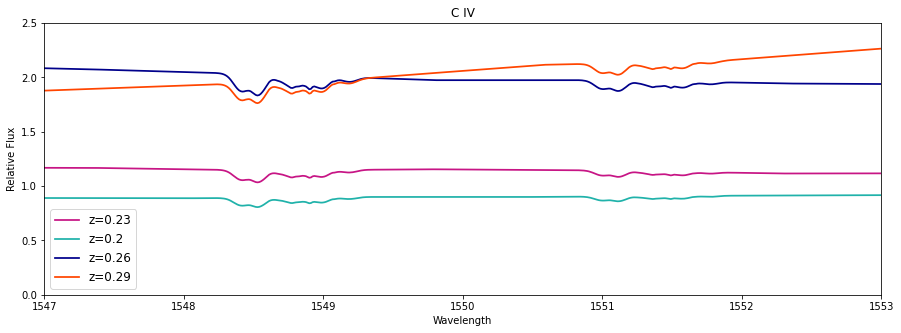

In [19]:
#Plot
fig = plt.figure(figsize=(15, 5))

plt.plot(z0[0], z0[1], color='mediumvioletred', label = "z=0.23", linewidth=1.75)
plt.plot(z2[0], z2[1], color='lightseagreen', label = "z=0.2", linewidth=1.75)
plt.plot(z5[0], z5[1], color='darkblue', label = "z=0.26", linewidth=1.75)
plt.plot(z1[0], z1[1], color='orangered', label = "z=0.29", linewidth=1.75)
plt.xlim(1547, 1553)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0, 2.5)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

### Zoomed out

Text(0, 0.5, 'Relative Flux')

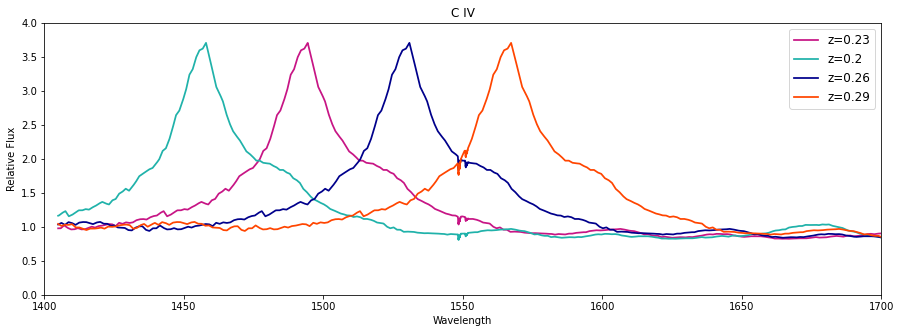

In [20]:
fig = plt.figure(figsize=(15, 5))

plt.plot(z0[0], z0[1], color='mediumvioletred', label = "z=0.23", linewidth=1.75)
plt.plot(z2[0], z2[1], color='lightseagreen', label = "z=0.2", linewidth=1.75)
plt.plot(z5[0], z5[1], color='darkblue', label = "z=0.26", linewidth=1.75)
plt.plot(z1[0], z1[1], color='orangered', label = "z=0.29", linewidth=1.75)
plt.xlim(1400, 1700)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0, 4)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

## No quasar; ray is redshifted

yt : [INFO     ] 2022-01-26 19:46:49,444 Getting segment at z = 0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:46:49,445 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:46:50,182 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:46:50,259 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:46:50,260 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:46:50,260 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:46:50,260 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] 

yt : [INFO     ] 2022-01-26 19:46:56,590 Getting segment at z = 0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:46:56,592 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:46:57,315 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:46:57,392 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:46:57,392 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:46:57,393 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:46:57,393 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:46:57,393 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:46:57,394 Setting instrument to COS-G160M
yt : [INFO     

yt : [INFO     ] 2022-01-26 19:47:04,021 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:47:04,688 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:47:04,765 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:47:04,765 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:47:04,765 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:47:04,766 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:47:04,766 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:47:04,767 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:47:04,776 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:47:04,780 Identified 2.490e+02 octs
yt : [INFO   

yt : [INFO     ] 2022-01-26 19:47:12,087 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:47:12,165 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:47:12,166 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:47:12,166 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:47:12,167 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:47:12,167 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:47:12,167 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:47:12,179 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:47:12,183 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:47:12,279 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:47:12,283 Creating spectrum
A

yt : [INFO     ] 2022-01-26 19:47:20,366 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:47:20,366 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:47:20,366 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:47:20,367 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:47:20,377 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:47:20,381 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:47:20,468 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:47:20,472 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2294.62it/s]
yt : [INFO     ] 2022-01-26 19:47:20,935 Writing spectrum to ascii file: spec5.txt.
yt : [INFO     ] 2022-01-26 19:47:21,260 Getting segment at z = 0.5: [0.         0.32890

yt : [INFO     ] 2022-01-26 19:47:28,892 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:47:28,893 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:47:28,903 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:47:28,906 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:47:28,993 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:47:28,996 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2951.23it/s]
yt : [INFO     ] 2022-01-26 19:47:29,374 Writing spectrum to ascii file: spec1.txt.
yt : [INFO     ] 2022-01-26 19:47:29,701 Getting segment at z = 1: [0.         0.32695313 0.25      ] unitary to [1.         0.32695313 0.25      ] unitary.
yt : [INFO     ] 2022-01-26 19:47:29,702 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary

yt : [INFO     ] 2022-01-26 19:47:37,207 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:47:37,341 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:47:37,344 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2127.33it/s]
yt : [INFO     ] 2022-01-26 19:47:37,868 Writing spectrum to ascii file: spec1.txt.
yt : [INFO     ] 2022-01-26 19:47:38,199 Getting segment at z = 1: [0.         0.33085938 0.25195312] unitary to [1.         0.33085938 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:47:38,200 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary] to [1.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:47:38,909 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:47:38,993 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:47:38,993 Parameters:

Text(0, 0.5, 'Relative Flux')

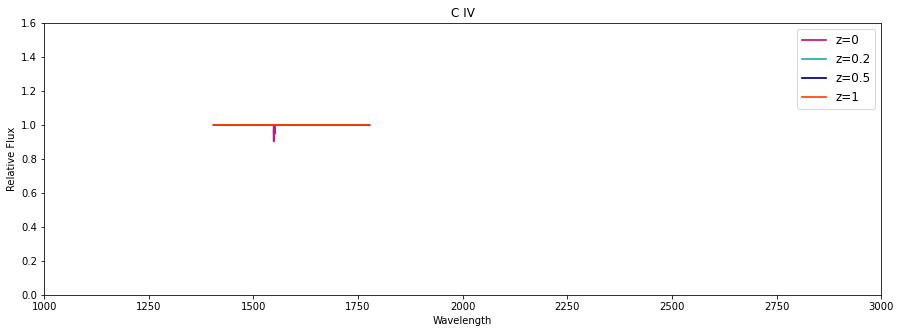

In [21]:
z0 = spec_red(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 0, 'spec.txt')
z2 = spec_red(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 0.2, 'spec2.txt')
z5 = spec_red(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 0.5, 'spec5.txt')
z1 = spec_red(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 1, 'spec1.txt')

#Plot
fig = plt.figure(figsize=(15, 5))

plt.plot(z0[0], z0[1], color='mediumvioletred', label = "z=0", linewidth=1.75)
plt.plot(z2[0], z2[1], color='lightseagreen', label = "z=0.2", linewidth=1.75)
plt.plot(z5[0], z5[1], color='darkblue', label = "z=0.5", linewidth=1.75)
plt.plot(z1[0], z1[1], color='orangered', label = "z=1", linewidth=1.75)
plt.xlim(1000, 3000)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0, 1.6)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

Only line at z = 0

## Observing redshift added

yt : [INFO     ] 2022-01-26 19:47:40,138 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:47:40,139 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:47:40,852 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:47:40,930 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:47:40,931 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:47:40,931 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:47:40,931 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:47:47,181 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:47:47,182 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:47:47,890 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:47:47,968 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:47:47,969 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:47:47,969 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:47:47,969 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:47:47,970 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:47:47,970 Setting instrument to COS-G160M
yt : [INFO   

yt : [INFO     ] 2022-01-26 19:47:54,381 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:47:55,038 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:47:55,116 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:47:55,116 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:47:55,116 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:47:55,117 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:47:55,117 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:47:55,117 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:47:55,127 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:47:55,131 Identified 2.490e+02 octs
yt : [INFO   

yt : [INFO     ] 2022-01-26 19:48:01,923 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:48:02,000 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:48:02,000 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:48:02,001 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:48:02,001 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:48:02,001 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:48:02,002 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:48:02,012 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:48:02,016 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:48:02,102 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:48:02,106 Creating spectrum
A

yt : [INFO     ] 2022-01-26 19:48:09,133 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:48:09,133 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:48:09,134 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:48:09,134 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:48:09,144 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:48:09,148 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:48:09,233 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:48:09,237 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6846.10it/s]
yt : [INFO     ] 2022-01-26 19:48:09,422 Writing spectrum to ascii file: spec5.txt.
yt : [INFO     ] 2022-01-26 19:48:09,747 Getting segment at z = 0.0: [0.         0.32890

yt : [INFO     ] 2022-01-26 19:48:16,199 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:48:16,199 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:48:16,200 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:48:16,200 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:48:16,210 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:48:16,213 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:48:16,299 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:48:16,302 Creating spectrum
yt : [INFO     ] 2022-01-26 19:48:16,333 287 out of 512 line components will be deposited as unresolved lines.
Adding line - C IV 1551 [1550.772000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6407.36it/s]
yt : [INFO     ] 2022-01-26 19:48:16,414 287 out of 512 line 

Text(0, 0.5, 'Relative Flux')

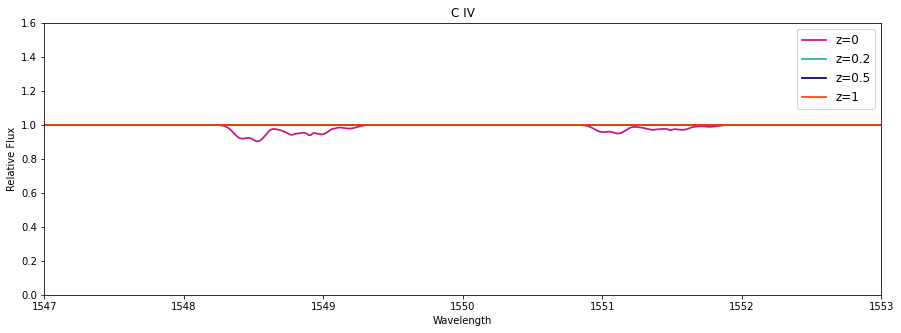

In [22]:
z0 = spec_obr(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 0, 'spec.txt')
z2 = spec_obr(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 0.2, 'spec2.txt')
z5 = spec_obr(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 0.5, 'spec5.txt')
z1 = spec_obr(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 1, 'spec1.txt')

#Plot
fig = plt.figure(figsize=(15, 5))

plt.plot(z0[0], z0[1], color='mediumvioletred', label = "z=0", linewidth=1.75)
plt.plot(z2[0], z2[1], color='lightseagreen', label = "z=0.2", linewidth=1.75)
plt.plot(z5[0], z5[1], color='darkblue', label = "z=0.5", linewidth=1.75)
plt.plot(z1[0], z1[1], color='orangered', label = "z=1", linewidth=1.75)
plt.xlim(1547, 1553)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0, 1.6)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

## Add Gaussian Noise

In [23]:
z3 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 3, 'spec.txt')
z10 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 10, 'spec2.txt')
z20 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 20, 'spec5.txt')
z30 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 30, 'spec1.txt')
z50 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 50, 'spec50.txt')

yt : [INFO     ] 2022-01-26 19:48:25,729 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:48:25,730 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:48:26,414 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:48:26,508 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:48:26,508 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:48:26,509 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:48:26,509 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:48:32,764 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:48:32,765 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:48:33,429 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:48:33,505 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:48:33,505 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:48:33,505 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:48:33,506 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:48:33,506 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:48:33,507 Setting instrument to COS-G160M
yt : [INFO   

yt : [INFO     ] 2022-01-26 19:48:39,891 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:48:40,552 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:48:40,630 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:48:40,630 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:48:40,630 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:48:40,631 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:48:40,631 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:48:40,631 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:48:40,642 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:48:40,646 Identified 2.490e+02 octs
yt : [INFO   

yt : [INFO     ] 2022-01-26 19:48:47,507 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:48:47,582 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:48:47,583 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:48:47,583 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:48:47,583 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:48:47,584 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:48:47,584 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:48:47,593 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:48:47,597 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:48:47,682 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:48:47,685 Creating spectrum
A

yt : [INFO     ] 2022-01-26 19:48:54,783 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:48:54,783 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:48:54,783 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:48:54,784 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:48:54,793 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:48:54,797 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:48:54,881 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:48:54,884 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6032.33it/s]
yt : [INFO     ] 2022-01-26 19:48:55,086 Writing spectrum to ascii file: spec5.txt.
yt : [INFO     ] 2022-01-26 19:48:55,452 Getting segment at z = 0.0: [0.         0.32890

yt : [INFO     ] 2022-01-26 19:49:03,032 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:49:03,032 Setting instrument to COS-G160M
yt : [INFO     ] 2022-01-26 19:49:03,044 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:49:03,048 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:49:03,137 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:49:03,140 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6292.72it/s]
yt : [INFO     ] 2022-01-26 19:49:03,333 Writing spectrum to ascii file: spec1.txt.
yt : [INFO     ] 2022-01-26 19:49:03,650 Getting segment at z = 0.0: [0.         0.32695313 0.25      ] unitary to [1.         0.32695313 0.25      ] unitary.
yt : [INFO     ] 2022-01-26 19:49:03,651 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unita

yt : [INFO     ] 2022-01-26 19:49:09,926 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:49:10,059 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:49:10,062 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6144.16it/s]
yt : [INFO     ] 2022-01-26 19:49:10,258 Writing spectrum to ascii file: spec1.txt.
yt : [INFO     ] 2022-01-26 19:49:10,576 Getting segment at z = 0.0: [0.         0.33085938 0.25195312] unitary to [1.         0.33085938 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:49:10,577 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary] to [1.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:49:11,230 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:49:11,306 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:49:11,306 Parameter

yt : [INFO     ] 2022-01-26 19:49:17,127 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6001.64it/s]
yt : [INFO     ] 2022-01-26 19:49:17,327 Writing spectrum to ascii file: spec50.txt.
yt : [INFO     ] 2022-01-26 19:49:17,646 Getting segment at z = 0.0: [0.         0.32890625 0.25      ] unitary to [1.         0.32890625 0.25      ] unitary.
yt : [INFO     ] 2022-01-26 19:49:17,648 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.25 unitary] to [1.0 unitary, 0.32890625 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:49:18,312 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:49:18,388 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:49:18,388 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:49:18,388 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:49:18,389 Parameters: domain_right_edge 

Text(0, 0.5, 'Relative Flux')

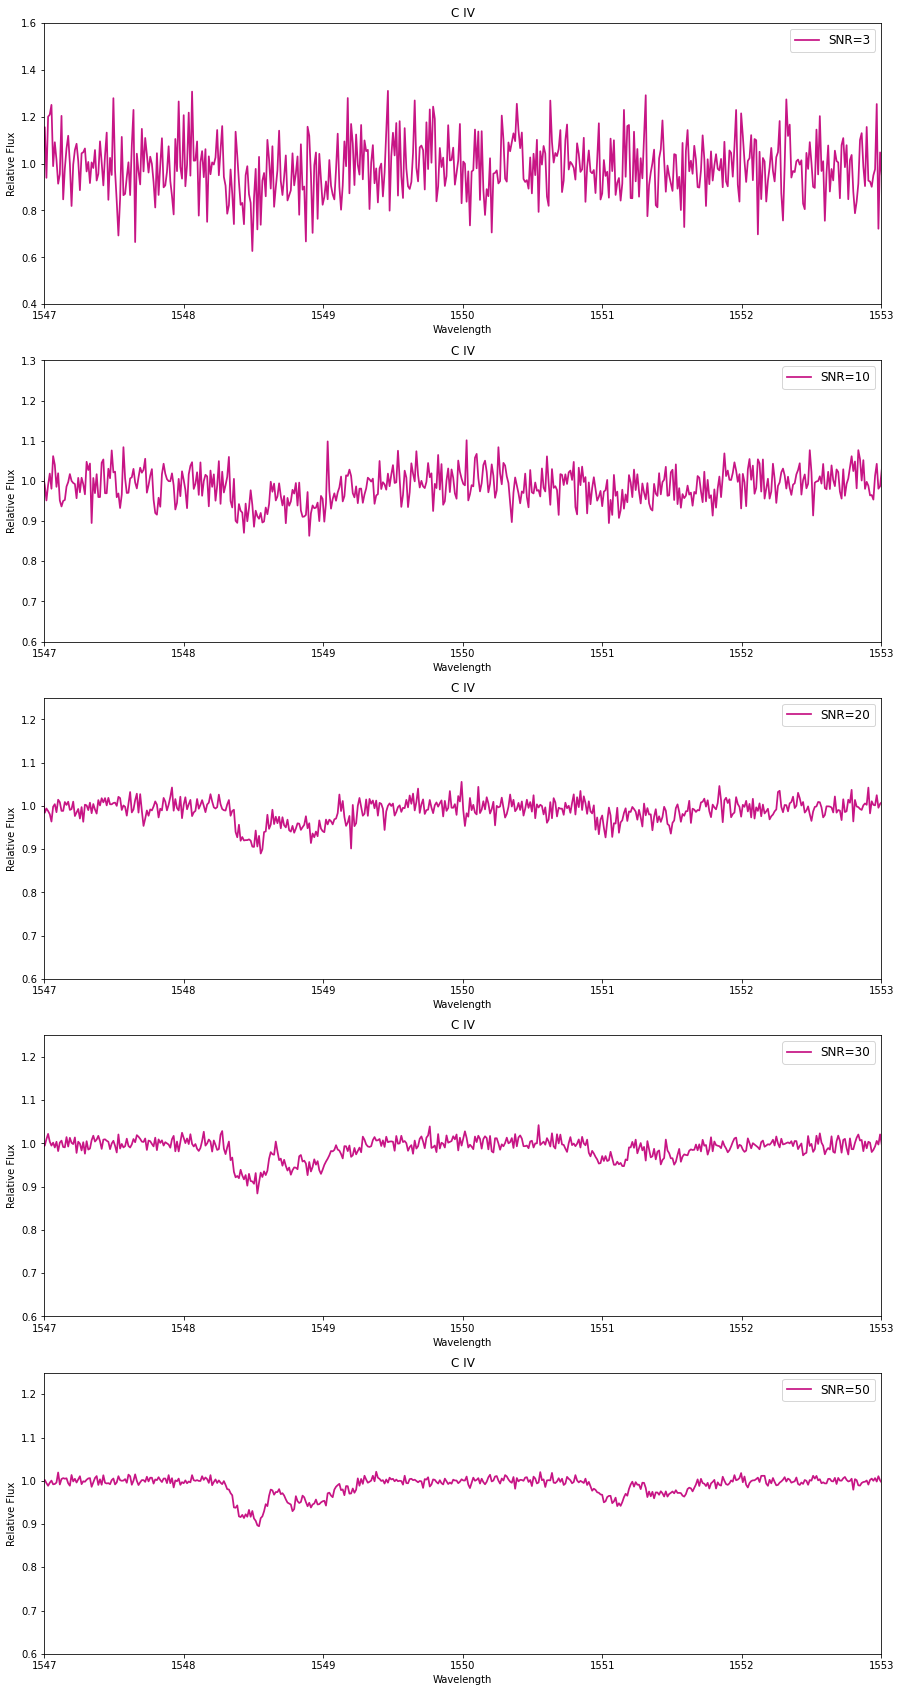

In [24]:
#Plot
fig = plt.figure(figsize=(15, 30))

p1 = fig.add_subplot(5,1,1)
plt.plot(z3[0], z3[1], color='mediumvioletred', label = "SNR=3", linewidth=1.75)
plt.xlim(1547, 1553)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0.4, 1.6)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p2 = fig.add_subplot(5,1,2)
plt.plot(z10[0], z10[1], color='mediumvioletred', label = "SNR=10", linewidth=1.75)
plt.xlim(1547, 1553)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0.6, 1.3)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p3 = fig.add_subplot(5,1,3)
plt.plot(z20[0], z20[1], color='mediumvioletred', label = "SNR=20", linewidth=1.75)
plt.xlim(1547, 1553)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0.6, 1.25)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p4 = fig.add_subplot(5,1,4)
plt.plot(z30[0], z30[1], color='mediumvioletred', label = "SNR=30", linewidth=1.75)
plt.xlim(1547, 1553)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0.6, 1.25)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p5 = fig.add_subplot(5,1,5)
plt.plot(z50[0], z50[1], color='mediumvioletred', label = "SNR=50", linewidth=1.75)
plt.xlim(1547, 1553)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0.6, 1.25)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

## MW foreground

yt : [INFO     ] 2022-01-26 19:49:23,718 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:49:23,719 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:49:24,426 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:49:24,502 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:49:24,502 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:49:24,502 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:49:24,503 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:49:30,870 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:49:30,871 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:49:31,538 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:49:31,613 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:49:31,614 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:49:31,614 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:49:31,614 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:49:31,615 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:49:31,615 Setting instrument to COS-G160M
yt : [INFO   

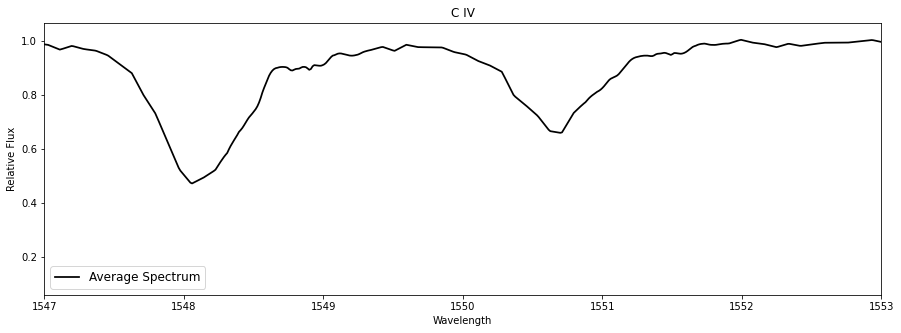

In [25]:
mw = spec_mw(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G160M', 'C IV', 1547, 1553)

# Ly a

yt : [INFO     ] 2022-01-26 19:49:35,414 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:49:35,416 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:49:36,075 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:49:36,150 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:49:36,150 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:49:36,151 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:49:36,151 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:49:51,366 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:49:51,367 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:49:52,082 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:49:52,157 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:49:52,158 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:49:52,158 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:49:52,158 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:49:52,159 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:49:52,159 Setting instrument to COS-G130M
yt : [INFO   

[array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.000

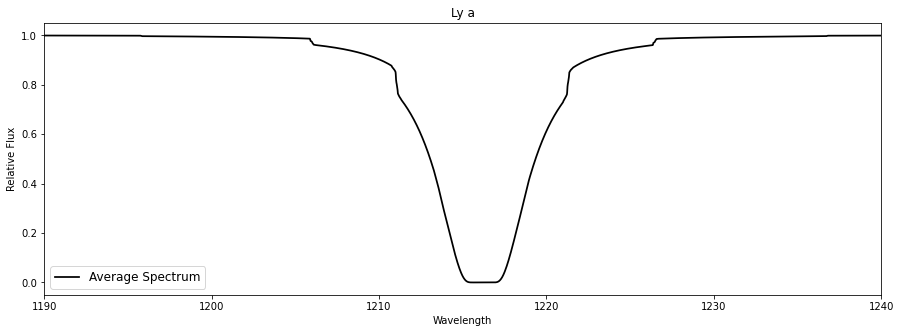

In [26]:
spec_all(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Ly a', 1190, 1240)

## MW foreground

yt : [INFO     ] 2022-01-26 19:50:00,029 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:50:00,031 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:50:00,745 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:50:00,821 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:50:00,821 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:50:00,822 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:50:00,822 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:50:16,256 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:50:16,258 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:50:16,980 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:50:17,057 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:50:17,057 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:50:17,057 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:50:17,058 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:50:17,058 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:50:17,059 Setting instrument to COS-G130M
yt : [INFO   

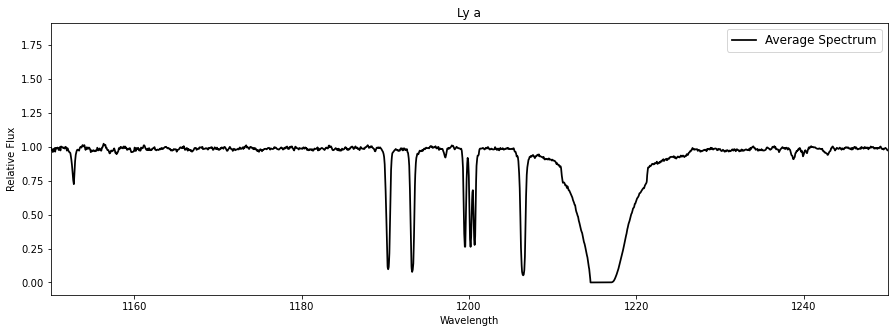

In [27]:
spec_mw(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Ly a', 1150, 1250)

## Gaussian Noise added

In [28]:
snr3 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Ly a', 3, 'spec1.txt')
snr10 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Ly a', 10, 'spec2.txt')
snr20 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Ly a', 20, 'spec3.txt')
snr30 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Ly a', 30, 'spec4.txt')

yt : [INFO     ] 2022-01-26 19:50:25,050 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:50:25,051 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:50:25,785 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:50:25,860 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:50:25,861 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:50:25,861 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:50:25,861 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:50:41,159 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:50:41,160 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:50:41,883 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:50:41,959 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:50:41,959 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:50:41,960 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:50:41,960 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:50:41,960 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:50:41,961 Setting instrument to COS-G130M
yt : [INFO   

yt : [INFO     ] 2022-01-26 19:50:55,990 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:50:56,713 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:50:56,790 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:50:56,790 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:50:56,790 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:50:56,791 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:50:56,791 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:50:56,792 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:50:56,803 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:50:56,806 Identified 2.490e+02 octs
yt : [INFO   

yt : [INFO     ] 2022-01-26 19:51:12,446 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:51:12,522 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:51:12,522 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:51:12,523 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:51:12,523 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:51:12,523 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:51:12,524 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:51:12,533 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:51:12,537 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:51:12,622 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:51:12,625 Creating spectrum
Addi

yt : [INFO     ] 2022-01-26 19:51:27,419 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:51:27,419 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:51:27,420 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:51:27,420 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:51:27,421 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:51:27,430 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:51:27,434 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:51:27,519 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:51:27,522 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:02<00:00, 211.01it/s]
yt : [INFO     ] 2022-01-26 19:51:29,978 Not adding continuum Ly C: insufficient column dens

yt : [INFO     ] 2022-01-26 19:51:43,228 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:51:43,228 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:51:43,228 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:51:43,238 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:51:43,242 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:51:43,327 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:51:43,330 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:01<00:00, 366.26it/s]
yt : [INFO     ] 2022-01-26 19:51:44,757 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-01-26 19:51:44,759 Writing spectrum to ascii file: spec4.txt.
yt : [INFO     ] 2022-01-26 19:51:45,068 Getting segment at z = 0.0: [0.         0.326953

yt : [INFO     ] 2022-01-26 19:51:58,239 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:51:58,249 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:51:58,252 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:51:58,336 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:51:58,339 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:02<00:00, 229.20it/s]
yt : [INFO     ] 2022-01-26 19:52:00,602 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-01-26 19:52:00,604 Writing spectrum to ascii file: spec4.txt.
yt : [INFO     ] 2022-01-26 19:52:00,918 Getting segment at z = 0.0: [0.         0.33085938 0.25195312] unitary to [1.         0.33085938 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:52:00,919 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary] to [1.0 unitary

Text(0, 0.5, 'Relative Flux')

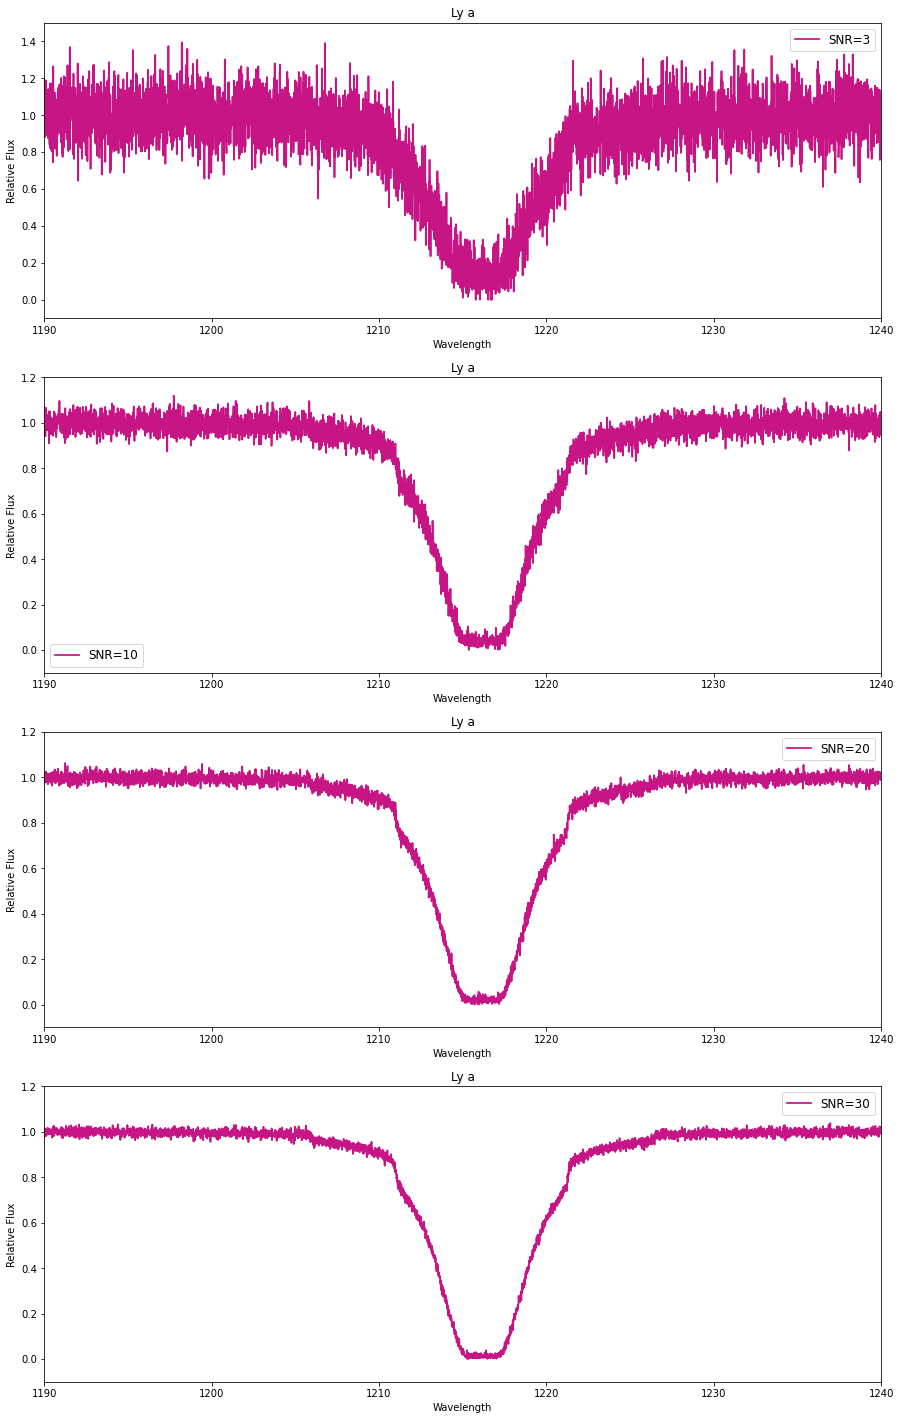

In [29]:
fig = plt.figure(figsize=(15, 25))

p1 = fig.add_subplot(4,1,1)
plt.plot(snr3[0], snr3[1], color='mediumvioletred', label = "SNR=3", linewidth=1.75)
plt.xlim(1190, 1240)
plt.title('Ly a')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.5)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p2 = fig.add_subplot(4,1,2)
plt.plot(snr10[0], snr10[1], color='mediumvioletred', label = "SNR=10", linewidth=1.75)
plt.xlim(1190, 1240)
plt.title('Ly a')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p3 = fig.add_subplot(4,1,3)
plt.plot(snr20[0], snr20[1], color='mediumvioletred', label = "SNR=20", linewidth=1.75)
plt.xlim(1190, 1240)
plt.title('Ly a')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p4 = fig.add_subplot(4,1,4)
plt.plot(snr30[0], snr30[1], color='mediumvioletred', label = "SNR=30", linewidth=1.75)
plt.xlim(1190, 1240)
plt.title('Ly a')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

# O I 1302

yt : [INFO     ] 2022-01-26 19:52:03,846 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:52:03,847 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:52:04,517 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:52:04,593 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:52:04,593 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:52:04,594 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:52:04,594 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:52:11,749 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:52:11,749 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:52:11,750 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:52:11,750 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:52:11,750 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:52:11,760 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:52:11,764 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:52:11,848 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:52:11,851 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3330.86it/s]
yt : [INFO     ] 2022-01-26 19:52:12,035 Writing spectrum to ascii file: spec.txt.
yt :

[array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.000

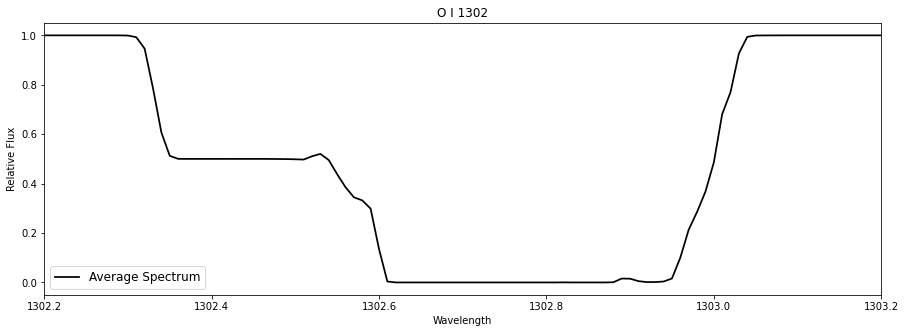

In [30]:
spec_all(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'O I 1302', 1302.2, 1303.2)

## MW Foreground

yt : [INFO     ] 2022-01-26 19:57:59,508 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:57:59,510 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:58:00,233 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:58:00,316 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:58:00,316 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:58:00,316 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:58:00,317 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:58:08,028 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:58:08,028 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:58:08,029 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:58:08,029 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:58:08,030 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:58:08,042 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:58:08,047 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:58:08,232 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:58:08,236 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2915.32it/s]
yt : [INFO     ] 2022-01-26 19:58:08,485 Writing spectrum to ascii file: spec.txt.
yt :

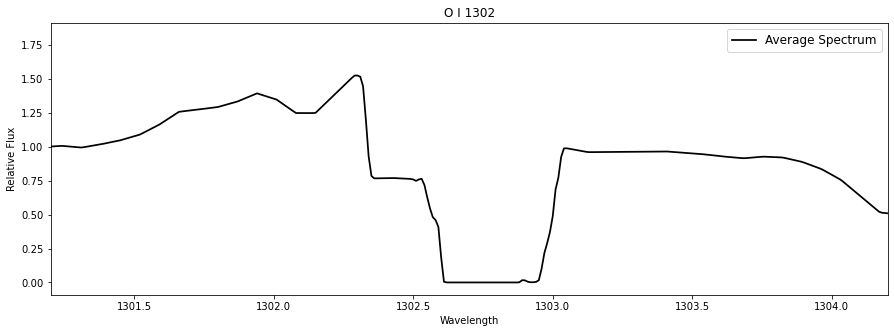

In [42]:
spec_mw(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'O I 1302', 1301.2, 1304.2)

## Gaussian Noise added

In [32]:
snr3 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'O I 1302', 3, 'spec1.txt')
snr10 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'O I 1302', 10, 'spec2.txt')
snr20 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'O I 1302', 20, 'spec3.txt')
snr30 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'O I 1302', 30, 'spec4.txt')

yt : [INFO     ] 2022-01-26 19:52:27,258 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:52:27,259 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:52:27,921 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:52:27,996 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:52:27,997 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:52:27,997 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:52:27,997 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:52:35,479 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:52:35,479 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:52:35,480 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:52:35,480 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:52:35,481 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:52:35,493 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:52:35,498 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:52:35,600 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:52:35,605 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2907.89it/s]
yt : [INFO     ] 2022-01-26 19:52:35,822 Writing spectrum to ascii file: spec1.txt.
yt 

yt : [INFO     ] 2022-01-26 19:52:43,498 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2064.05it/s]
yt : [INFO     ] 2022-01-26 19:52:43,785 Writing spectrum to ascii file: spec2.txt.
yt : [INFO     ] 2022-01-26 19:52:44,126 Getting segment at z = 0.0: [0.         0.32695313 0.25195312] unitary to [1.         0.32695313 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:52:44,127 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.251953125 unitary] to [1.0 unitary, 0.326953125 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:52:44,827 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:52:44,905 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:52:44,906 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:52:44,906 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:52:44,907 Parameters: doma

yt : [INFO     ] 2022-01-26 19:52:52,619 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:52:52,619 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:52:52,619 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:52:52,620 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:52:52,620 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:52:52,630 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:52:52,634 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:52:52,719 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:52:52,723 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2069.74it/s]
yt : [INFO     ] 2022-01-26 19:52:53,003 Writing spectrum to ascii file: spec3.txt.
yt 

yt : [INFO     ] 2022-01-26 19:52:59,811 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3295.15it/s]
yt : [INFO     ] 2022-01-26 19:52:59,998 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2022-01-26 19:53:00,311 Getting segment at z = 0.0: [0.         0.33085938 0.25      ] unitary to [1.         0.33085938 0.25      ] unitary.
yt : [INFO     ] 2022-01-26 19:53:00,312 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.25 unitary] to [1.0 unitary, 0.33085937500000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:53:00,955 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:53:01,031 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:53:01,032 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:53:01,032 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:53:01,032 Parameters: do

yt : [INFO     ] 2022-01-26 19:53:08,165 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:53:08,165 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:53:08,165 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:53:08,166 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:53:08,166 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:53:08,167 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:53:08,176 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:53:08,180 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:53:08,263 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:53:08,266 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3219.

Text(0, 0.5, 'Relative Flux')

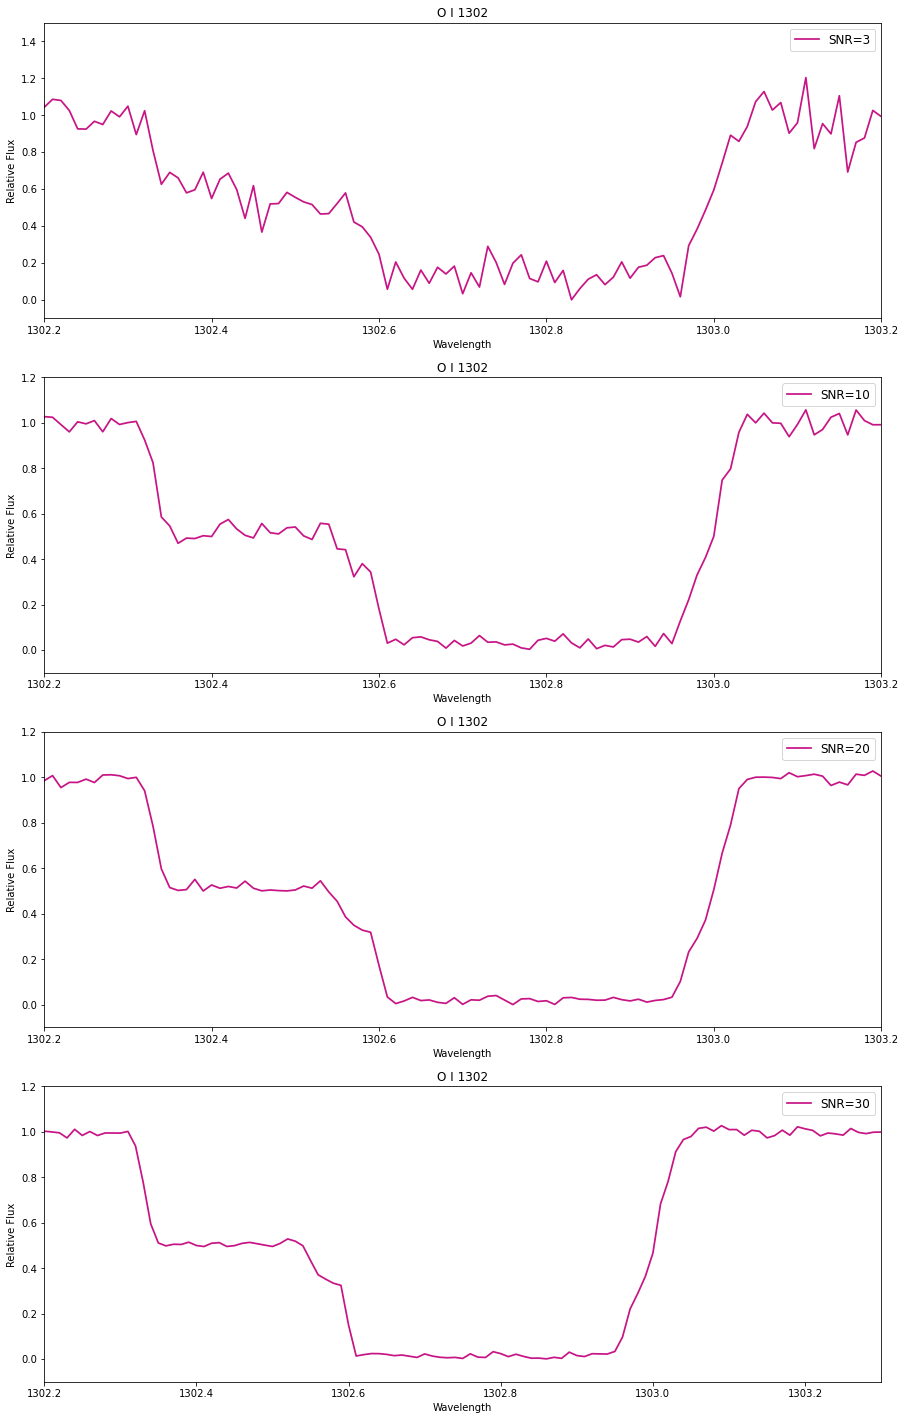

In [33]:
fig = plt.figure(figsize=(15, 25))

p1 = fig.add_subplot(4,1,1)
plt.plot(snr3[0], snr3[1], color='mediumvioletred', label = "SNR=3", linewidth=1.75)
plt.xlim(1302.2, 1303.2)
plt.title('O I 1302')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.5)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p2 = fig.add_subplot(4,1,2)
plt.plot(snr10[0], snr10[1], color='mediumvioletred', label = "SNR=10", linewidth=1.75)
plt.xlim(1302.2, 1303.2)
plt.title('O I 1302')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p3 = fig.add_subplot(4,1,3)
plt.plot(snr20[0], snr20[1], color='mediumvioletred', label = "SNR=20", linewidth=1.75)
plt.xlim(1302.2, 1303.2)
plt.title('O I 1302')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p4 = fig.add_subplot(4,1,4)
plt.plot(snr30[0], snr30[1], color='mediumvioletred', label = "SNR=30", linewidth=1.75)
plt.xlim(1302.2, 1303.3)
plt.title('O I 1302')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

# Si II 1304

yt : [INFO     ] 2022-01-26 19:53:14,775 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:53:14,776 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:53:15,422 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:53:15,498 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:53:15,498 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:53:15,499 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:53:15,499 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:53:22,955 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:53:22,956 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:53:22,956 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:53:22,956 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:53:22,957 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:53:22,966 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:53:22,970 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:53:23,054 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:53:23,057 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2426.98it/s]
yt : [INFO     ] 2022-01-26 19:53:23,296 Writing spectrum to ascii file: spec.txt

[array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.000

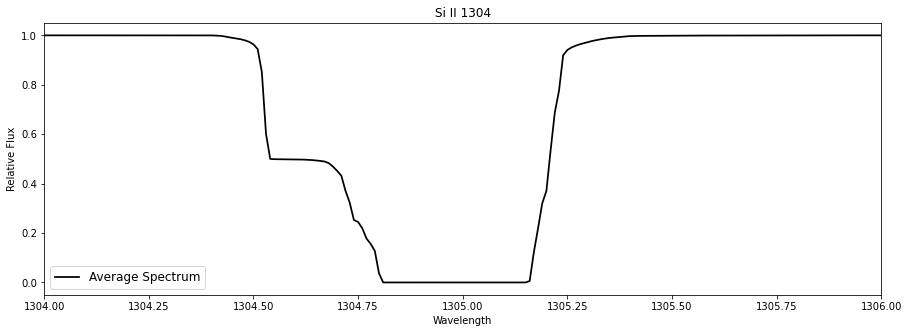

In [34]:
spec_all(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Si II 1304', 1304, 1306)

## MW Foreground Added

yt : [INFO     ] 2022-01-26 19:58:33,781 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:58:33,783 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:58:34,456 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:58:34,538 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:58:34,538 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:58:34,538 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:58:34,539 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:58:42,668 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:58:42,669 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:58:42,669 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:58:42,669 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:58:42,670 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:58:42,681 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:58:42,686 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:58:42,789 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:58:42,794 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2165.10it/s]
yt : [INFO     ] 2022-01-26 19:58:43,103 Writing spectrum to ascii file: spec.txt

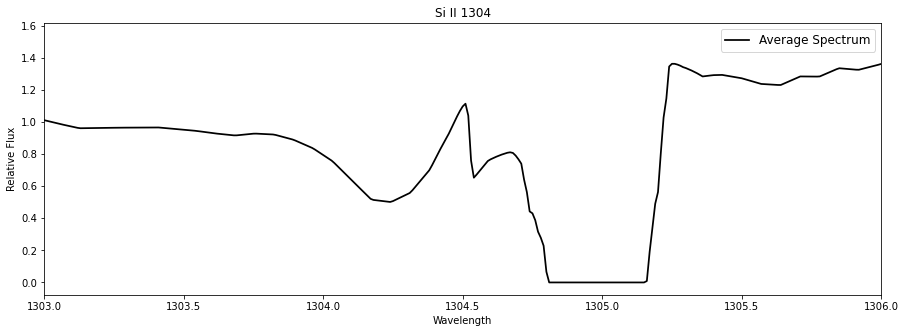

In [43]:
spec_mw(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Si II 1304', 1303, 1306)

## Gaussian Noise Added

In [36]:
snr3 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Si II 1304', 3, 'spec1.txt')
snr10 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Si II 1304', 10, 'spec2.txt')
snr20 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Si II 1304', 20, 'spec3.txt')
snr30 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'Si II 1304', 30, 'spec4.txt')

yt : [INFO     ] 2022-01-26 19:53:39,146 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:53:39,147 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:53:39,790 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:53:39,866 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:53:39,866 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:53:39,866 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:53:39,867 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:53:47,255 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:53:47,255 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:53:47,256 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:53:47,256 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:53:47,256 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:53:47,266 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:53:47,270 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:53:47,355 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:53:47,358 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2427.32it/s]
yt : [INFO     ] 2022-01-26 19:53:47,599 Writing spectrum to ascii file: spec1.tx

yt : [INFO     ] 2022-01-26 19:53:54,667 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:53:54,670 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1552.81it/s]
yt : [INFO     ] 2022-01-26 19:53:55,029 Writing spectrum to ascii file: spec2.txt.
yt : [INFO     ] 2022-01-26 19:53:55,340 Getting segment at z = 0.0: [0.         0.32695313 0.25195312] unitary to [1.         0.32695313 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:53:55,341 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.251953125 unitary] to [1.0 unitary, 0.326953125 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:53:56,047 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:53:56,123 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:53:56,123 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:53:56,124 P

yt : [INFO     ] 2022-01-26 19:54:03,391 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:54:03,467 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:54:03,467 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:54:03,468 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:54:03,468 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:54:03,468 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:54:03,469 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:54:03,478 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:54:03,482 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:54:03,566 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:54:03,569 Creating spectrum


yt : [INFO     ] 2022-01-26 19:54:10,834 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:54:10,837 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:54:10,921 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:54:10,924 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2436.05it/s]
yt : [INFO     ] 2022-01-26 19:54:11,163 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2022-01-26 19:54:11,473 Getting segment at z = 0.0: [0.         0.33085938 0.25      ] unitary to [1.         0.33085938 0.25      ] unitary.
yt : [INFO     ] 2022-01-26 19:54:11,474 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.25 unitary] to [1.0 unitary, 0.33085937500000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:54:12,189 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:54:12,265 Parameters: 

yt : [INFO     ] 2022-01-26 19:54:19,013 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.251953125 unitary] to [1.0 unitary, 0.326953125 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:54:19,731 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:54:19,806 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:54:19,807 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:54:19,807 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:54:19,807 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:54:19,808 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:54:19,808 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:54:19,819 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:54:19,823 Identified 2.490e+02 octs

Text(0, 0.5, 'Relative Flux')

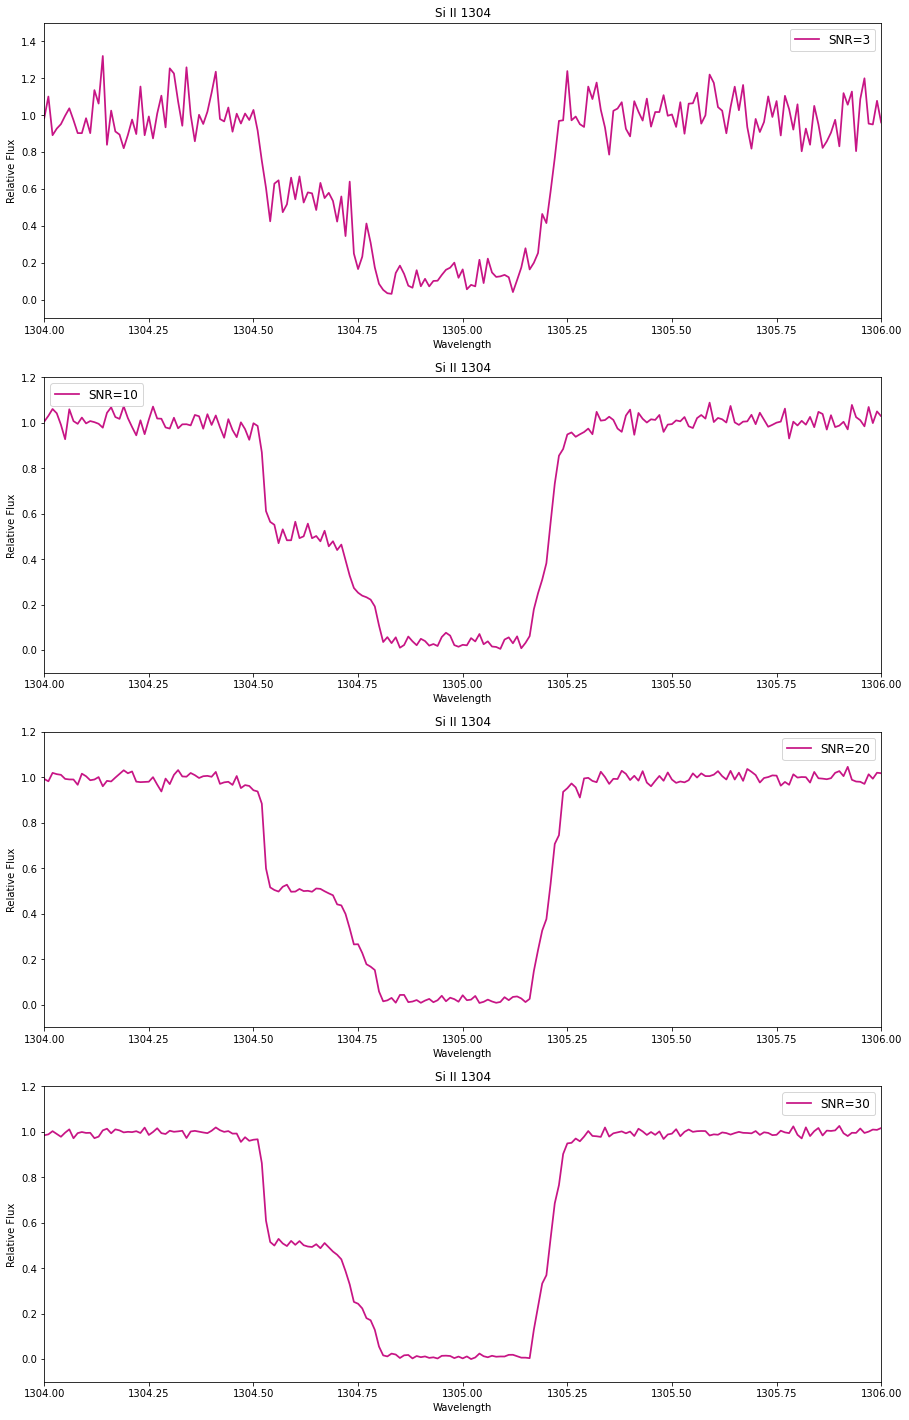

In [37]:
fig = plt.figure(figsize=(15, 25))

p1 = fig.add_subplot(4,1,1)
plt.plot(snr3[0], snr3[1], color='mediumvioletred', label = "SNR=3", linewidth=1.75)
plt.xlim(1304, 1306)
plt.title('Si II 1304')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.5)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p2 = fig.add_subplot(4,1,2)
plt.plot(snr10[0], snr10[1], color='mediumvioletred', label = "SNR=10", linewidth=1.75)
plt.xlim(1304, 1306)
plt.title('Si II 1304')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p3 = fig.add_subplot(4,1,3)
plt.plot(snr20[0], snr20[1], color='mediumvioletred', label = "SNR=20", linewidth=1.75)
plt.xlim(1304, 1306)
plt.title('Si II 1304')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p4 = fig.add_subplot(4,1,4)
plt.plot(snr30[0], snr30[1], color='mediumvioletred', label = "SNR=30", linewidth=1.75)
plt.xlim(1304, 1306)
plt.title('Si II 1304')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

# C II 1335

yt : [INFO     ] 2022-01-26 19:54:26,845 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:54:26,846 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:54:27,495 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:54:27,572 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:54:27,573 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:54:27,573 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:54:27,573 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:54:34,763 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:54:34,764 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:54:34,764 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:54:34,764 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:54:34,765 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:54:34,774 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:54:34,778 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:54:34,863 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:54:34,866 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3053.45it/s]
yt : [INFO     ] 2022-01-26 19:54:35,063 Writing spectrum to ascii file: spec.txt.


[array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]]), array([[1.15000e+03, 1.15001e+03, 1.15002e+03, ..., 1.44998e+03,
        1.44999e+03, 1.45000e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.000

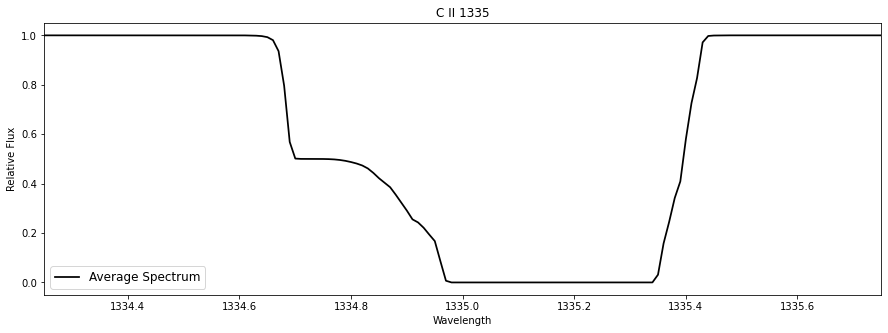

In [38]:
spec_all(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'C II 1335', 1334.25, 1335.75)

## MW Foreground Added

yt : [INFO     ] 2022-01-26 19:58:58,671 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:58:58,674 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:58:59,346 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:58:59,428 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:58:59,428 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:58:59,429 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:58:59,429 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:59:07,126 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:59:07,126 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:59:07,127 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:59:07,127 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:59:07,128 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:59:07,138 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:59:07,142 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:59:07,232 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:59:07,236 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2957.26it/s]
yt : [INFO     ] 2022-01-26 19:59:07,474 Writing spectrum to ascii file: spec.txt.


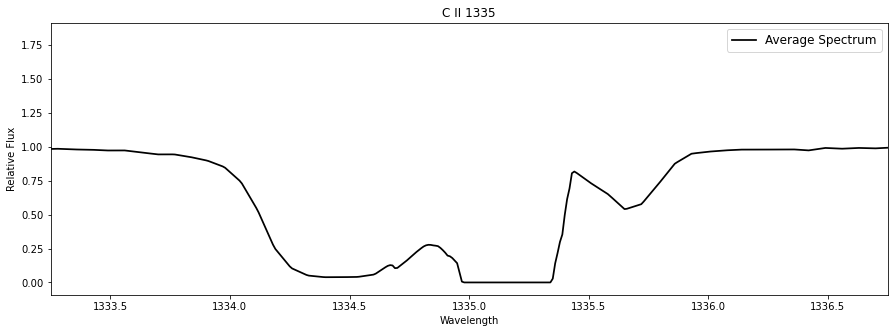

In [44]:
spec_mw(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'C II 1335', 1333.25, 1336.75)

## Gaussian Noise Added

In [40]:
snr3 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'C II 1335', 3, 'spec1.txt')
snr10 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'C II 1335', 10, 'spec2.txt')
snr20 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'C II 1335', 20, 'spec3.txt')
snr30 = spec_noise(0, .65, .5, 2, .65, .5, 4, 2, 'COS-G130M', 'C II 1335', 30, 'spec4.txt')

yt : [INFO     ] 2022-01-26 19:54:50,344 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-01-26 19:54:50,346 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:54:51,034 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:54:51,110 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:54:51,110 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:54:51,111 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:54:51,111 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22

yt : [INFO     ] 2022-01-26 19:54:58,192 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:54:58,193 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:54:58,193 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:54:58,193 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:54:58,194 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:54:58,203 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:54:58,207 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:54:58,291 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:54:58,294 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3108.44it/s]
yt : [INFO     ] 2022-01-26 19:54:58,489 Writing spectrum to ascii file: spec1.txt.

yt : [INFO     ] 2022-01-26 19:55:05,453 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:55:05,456 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2044.61it/s]
yt : [INFO     ] 2022-01-26 19:55:05,736 Writing spectrum to ascii file: spec2.txt.
yt : [INFO     ] 2022-01-26 19:55:06,047 Getting segment at z = 0.0: [0.         0.32695313 0.25195312] unitary to [1.         0.32695313 0.25195312] unitary.
yt : [INFO     ] 2022-01-26 19:55:06,048 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.251953125 unitary] to [1.0 unitary, 0.326953125 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:55:06,693 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:55:06,769 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:55:06,769 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:55:06,770 Par

yt : [INFO     ] 2022-01-26 19:55:13,861 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:55:13,937 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:55:13,937 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:55:13,937 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:55:13,938 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:55:13,938 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:55:13,938 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:55:13,948 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:55:13,951 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:55:14,034 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:55:14,037 Creating spectrum
A

yt : [INFO     ] 2022-01-26 19:55:20,970 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:55:20,974 Identified 2.490e+02 octs
yt : [INFO     ] 2022-01-26 19:55:21,058 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-01-26 19:55:21,061 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3066.14it/s]
yt : [INFO     ] 2022-01-26 19:55:21,257 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2022-01-26 19:55:21,566 Getting segment at z = 0.0: [0.         0.33085938 0.25      ] unitary to [1.         0.33085938 0.25      ] unitary.
yt : [INFO     ] 2022-01-26 19:55:21,567 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.25 unitary] to [1.0 unitary, 0.33085937500000007 unitary, 0.25 unitary].
yt : [INFO     ] 2022-01-26 19:55:22,201 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:55:22,277 Parameters: cu

yt : [INFO     ] 2022-01-26 19:55:28,712 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.251953125 unitary] to [1.0 unitary, 0.326953125 unitary, 0.251953125 unitary].
yt : [INFO     ] 2022-01-26 19:55:29,427 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-01-26 19:55:29,503 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-01-26 19:55:29,504 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-01-26 19:55:29,504 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-01-26 19:55:29,504 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-01-26 19:55:29,505 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-01-26 19:55:29,505 Setting instrument to COS-G130M
yt : [INFO     ] 2022-01-26 19:55:29,515 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-01-26 19:55:29,519 Identified 2.490e+02 octs

Text(0, 0.5, 'Relative Flux')

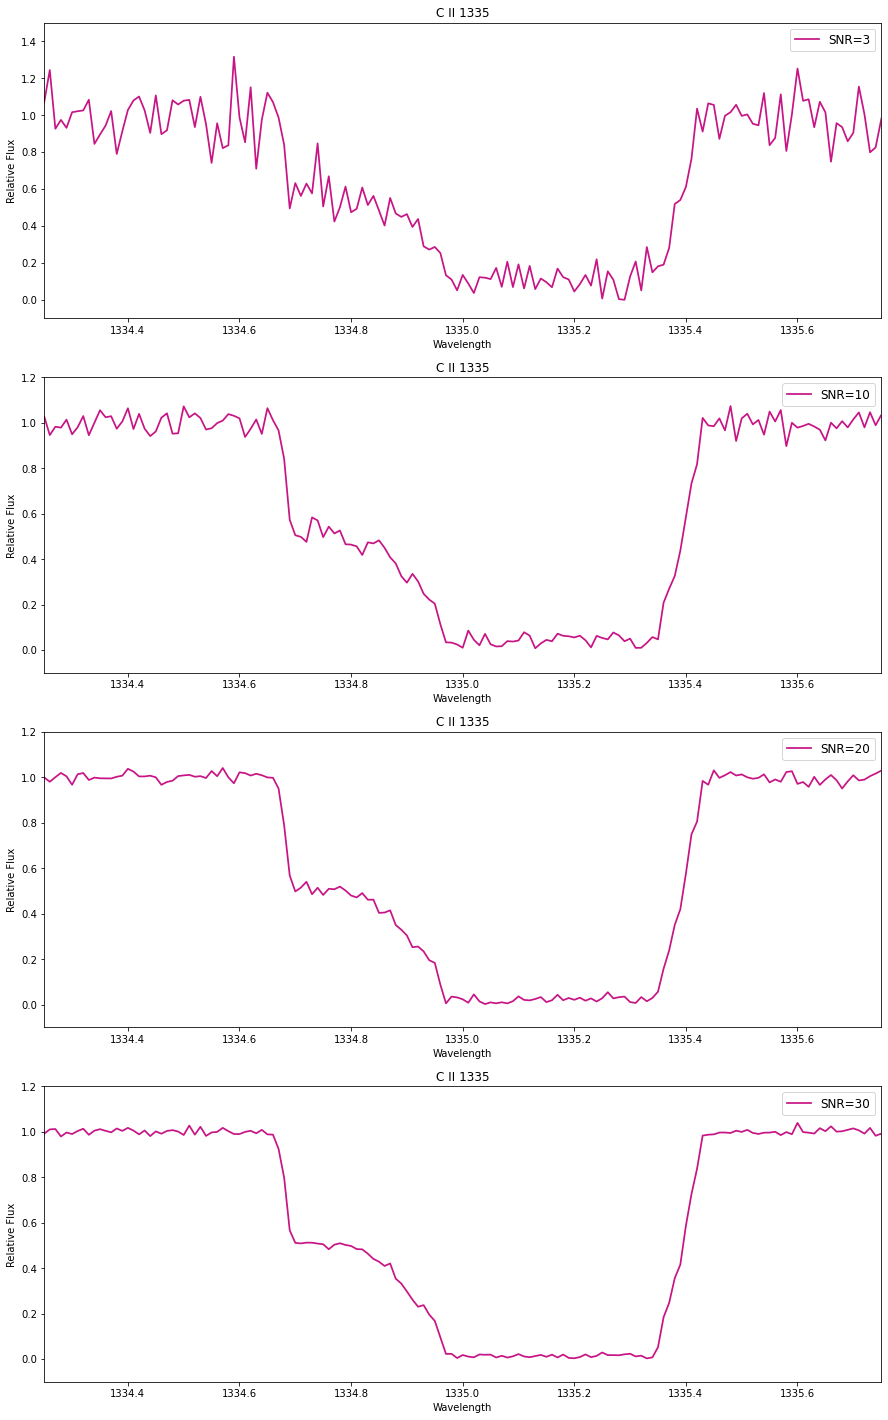

In [41]:
fig = plt.figure(figsize=(15, 25))

p1 = fig.add_subplot(4,1,1)
plt.plot(snr3[0], snr3[1], color='mediumvioletred', label = "SNR=3", linewidth=1.75)
plt.xlim(1334.25, 1335.75)
plt.title('C II 1335')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.5)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p2 = fig.add_subplot(4,1,2)
plt.plot(snr10[0], snr10[1], color='mediumvioletred', label = "SNR=10", linewidth=1.75)
plt.xlim(1334.25, 1335.75)
plt.title('C II 1335')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p3 = fig.add_subplot(4,1,3)
plt.plot(snr20[0], snr20[1], color='mediumvioletred', label = "SNR=20", linewidth=1.75)
plt.xlim(1334.25, 1335.75)
plt.title('C II 1335')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

p4 = fig.add_subplot(4,1,4)
plt.plot(snr30[0], snr30[1], color='mediumvioletred', label = "SNR=30", linewidth=1.75)
plt.xlim(1334.25, 1335.75)
plt.title('C II 1335')
plt.legend(fontsize='large')
plt.ylim(-0.1, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

### To do

- do redshift ray with manual lamdas
- do snr with 10, 3, 20, 30